In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from PIL import Image
from sklearn.metrics import mean_squared_error
from pmdarima.arima import auto_arima
from statsmodels.tsa.api import Holt, SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# Story 1

In [2]:
df = pd.read_csv("Data/BieuDoTheoTinh.csv")
df

,id,name,population,new_case,new_death,new_recovered,new_active,total_case,total_death,total_active,total_recovered,death_yesterday,case_yesterday,recovered_yesterday,death_average_7days,case_average_7days,percent_case_population,last_updated
0,1,Hà Nội,8053664,0,0,0,0,1608652,1221,0,0,0,297,0,0.0,150.71,19.974163,14/07/2022 16:46:35
1,2,TP HCM,8993082,0,0,0,0,612386,19984,0,0,0,82,0,0.0,44.86,6.809523,14/07/2022 16:46:35
2,28,Thanh Hóa,3640128,0,0,0,0,167957,107,0,0,0,33,0,0.0,22.57,4.614041,14/07/2022 16:46:35
3,29,Nghệ An,3327791,0,0,0,0,486217,145,0,0,0,75,0,0.0,30.86,14.610803,14/07/2022 16:46:35
4,48,Đồng Nai,3097107,0,0,0,0,106669,1900,0,0,0,3,0,0.0,1.71,3.444150,14/07/2022 16:46:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,45,Ninh Thuận,590467,0,0,0,0,8699,60,0,0,0,2,0,0.0,0.29,1.473241,14/07/2022 16:46:35
59,36,Kon Tum,540438,0,0,0,0,26139,1,0,0,0,0,0,0.0,0.00,4.836633,14/07/2022 16:46:35
60,6,Cao Bằng,530341,0,0,0,0,95608,57,0,0,0,6,0,0.0,4.71,18.027646,14/07/2022 16:46:35
61,7,Lai Châu,460196,0,0,0,0,74060,0,0,0,0,11,0,0.0,5.57,16.093143,14/07/2022 16:46:35


In [3]:
fig = px.scatter(df, x="total_case", y="total_death", color="name", size="population", log_x=True, title="Phân bố số ca nhiễm bệnh và số ca tử vong theo tỉnh")
fig.show()

## Nhận xét:
Ta thấy số lượng ca nhiễm lớn nhất ở 2 thành phố có mật độ dân cư lớn là thành phố Hồ Chí Minh và Hà Nội. Có một điểm đặc biệt là tuy Hà Nội có số ca mắc lớn hơn rất nhiều so với TPHCM nhưng tổng số ca tử vong ở TPHCM lại cao hơn ở Hà Nội. Điều này là do TPHCM là nơi đầu tiên trên cả nước bùng dịch. Vào thời điểm đó tỷ lệ tiêm vắc xin chưa cao cộng với việc thiếu sự hỗ trợ y tế cần thiết (bác sĩ, y tá, giường bệnh, thuốc chữa bệnh, ...) dẫn đến số người tử vong tăng cao. Hà Nội bùng dịch sau đó vài tháng, và cũng có sự chuẩn bị kỹ để đối phó nên hạn chế số lượng tử vong rất nhiều.

# Story 2  

In [4]:
df = pd.read_excel("Data/Covid_All.xlsx", sheet_name="Covid_All")
df

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,2020-01-23,2,2,NaN,NaN,NaN,NaN,0.021,0.021,NaN,...,6171.884,2,245.465,6,1,45.9,85.847,2.6,75.4,0.704
1,2020-01-24,2,0,NaN,NaN,NaN,NaN,0.021,0.000,NaN,...,6171.884,2,245.465,6,1,45.9,85.847,2.6,75.4,0.704
2,2020-01-25,2,0,NaN,NaN,NaN,NaN,0.021,0.000,NaN,...,6171.884,2,245.465,6,1,45.9,85.847,2.6,75.4,0.704
3,2020-01-26,2,0,NaN,NaN,NaN,NaN,0.021,0.000,NaN,...,6171.884,2,245.465,6,1,45.9,85.847,2.6,75.4,0.704
4,2020-01-27,2,0,NaN,NaN,NaN,NaN,0.021,0.000,NaN,...,6171.884,2,245.465,6,1,45.9,85.847,2.6,75.4,0.704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,2022-07-16,10759850,705,786.000,43091.0,1.0,0.286,110393.636,7.233,8.064,...,6171.884,2,245.465,6,1,45.9,85.847,2.6,75.4,0.704
906,2022-07-17,10760595,745,826.000,43091.0,0.0,0.286,110401.279,7.644,8.475,...,6171.884,2,245.465,6,1,45.9,85.847,2.6,75.4,0.704
907,2022-07-18,10761435,840,864.857,43091.0,0.0,0.286,110409.898,8.618,8.873,...,6171.884,2,245.465,6,1,45.9,85.847,2.6,75.4,0.704
908,2022-07-19,10762532,1097,896.857,43091.0,0.0,0.143,110421.153,11.255,9.202,...,6171.884,2,245.465,6,1,45.9,85.847,2.6,75.4,0.704


In [5]:
fig = px.line(df, x="date", y="total_cases",
              hover_data={"date": "|%B %d, %Y"},
              title='Tổng số ca nhiễm bệnh theo thời gian')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

## Nhận xét:
- Ta có thể thấy rằng dịch bắt đầu bùng phát mạnh vào tháng 7. Cùng thời điểm đó, nhà nước đã siết chặt các quy định đi lại nhằm hạn chế tối đa sự lây lang nhanh chóng của dịch COVID-19. Nhờ vậy mà đồ thị không có dạng dựng đứng như các quốc gia khác ở thời kỳ đầu bùng dịch. ([link](https://tuoitre.vn/tp-hcm-gian-cach-toan-thanh-pho-theo-chi-thi-16-trong-15-ngay-tu-0h-9-7-20210707181657126.htm))

![](images/chi_thi_16.png)  



- Sau giai đoạn phong tỏa kéo dài gây ảnh hưởng nghiêm trọng đến đời sống người dân cũng như là nền kinh tế, nhà nước ta đã quyết định mở cửa trờ lại. Chúng ta có thể thấy là sau đó số lượng ca mắc mới tăng lên rất nhanh, đồ thị dựng đứng. Nhưng vì người dân đã tiêm vắc xin đầy đủ nên số lượng ca chuyển nặng và tử vong vẫn giữ ở mức ổn định. ([link](https://thuvienphapluat.vn/tintuc/vn/thoi-su-phap-luat/thoi-su/37501/tphcm-du-kien-mo-cua-toan-bo-hoat-dong-sau-15-1-2022))
![](images/mo_cua.png)

# Story 3

In [6]:
df_case_death = df[["date", "total_cases", "total_deaths"]]

In [7]:
df_case_death = df_case_death.fillna(value=0)
df_case_death

,date,total_cases,total_deaths
0,2020-01-23,2,0.0
1,2020-01-24,2,0.0
2,2020-01-25,2,0.0
3,2020-01-26,2,0.0
4,2020-01-27,2,0.0
...,...,...,...
905,2022-07-16,10759850,43091.0
906,2022-07-17,10760595,43091.0
907,2022-07-18,10761435,43091.0
908,2022-07-19,10762532,43091.0


In [8]:
df_case_death.corr()

,total_cases,total_deaths
total_cases,1.000000,0.849408
total_deaths,0.849408,1.000000


In [9]:
df_case_death[["total_cases", "total_deaths"]] = (df_case_death[["total_cases", "total_deaths"]] - df_case_death[["total_cases", "total_deaths"]].min())/(df_case_death[["total_cases", "total_deaths"]].max() - df_case_death[["total_cases", "total_deaths"]].min())

In [10]:
fig = px.line(df_case_death, x="date", y=df_case_death.columns,
              hover_data={"date": "|%B %d, %Y"},
              title='Tổng số ca nhiễm bệnh và tử vong theo thời gian')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

## Nhận xét:
- Độ tương đồng của tổng số ca tử vong với tổng số ca mắc bệnh cao (0.849). Chúng ta có thể đưa ra kết luận đơn giản là tổng số ca bệnh càng tăng thì tổng số ca tử vong cũng tăng tương ứng.

# Story 4  

In [11]:
df_death_vaccin = df[["date", "total_deaths", "people_vaccinated"]].dropna()
df_death_vaccin

,date,total_deaths,people_vaccinated
409,2021-03-07,35.0,0.0
410,2021-03-08,35.0,377.0
411,2021-03-09,35.0,522.0
412,2021-03-10,35.0,955.0
413,2021-03-11,35.0,1585.0
...,...,...,...
888,2022-06-29,43087.0,86384303.0
889,2022-06-30,43087.0,86438964.0
891,2022-07-02,43087.0,86501993.0
892,2022-07-03,43087.0,86510260.0


In [12]:
df_death_vaccin.corr()

,total_deaths,people_vaccinated
total_deaths,1.000000,0.979139
people_vaccinated,0.979139,1.000000


In [13]:
df_death_vaccin[["people_vaccinated", "total_deaths"]] = (df_death_vaccin[["people_vaccinated", "total_deaths"]] - df_death_vaccin[["people_vaccinated", "total_deaths"]].min())/(df_death_vaccin[["people_vaccinated", "total_deaths"]].max() - df_death_vaccin[["people_vaccinated", "total_deaths"]].min())

In [14]:
fig = px.line(df_death_vaccin, x="date", y=df_death_vaccin.columns,
              hover_data={"date": "|%B %d, %Y"},
              title='Tổng số người tiêm vắc xin và tổng số ca tử vong theo thời gian')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

## Nhận xét:
- Độ tương đồng của tổng số ca tử vong với tổng số người tiêm vắc xin cao (0.979). Chúng ta có thể đưa ra kết luận đơn giản là tổng số người tiêm vắc xin càng tăng thì tổng số ca tử vong cũng tăng tương ứng :))

# Phân tích và dự đoán tổng số ca nhiễm.

In [15]:
df_cases = df[["date", "total_cases"]].dropna()

train_size = int(len(df_cases) * 0.92)
df_cases_train, df_cases_test = df_cases[0:train_size], df_cases[train_size:len(df_cases)]

## 1. Phân rã chuỗi dữ liệu

### 1.1. Mô hình cộng phân rã

In [16]:
decomposition = seasonal_decompose(df_cases_train.set_index("date"))
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

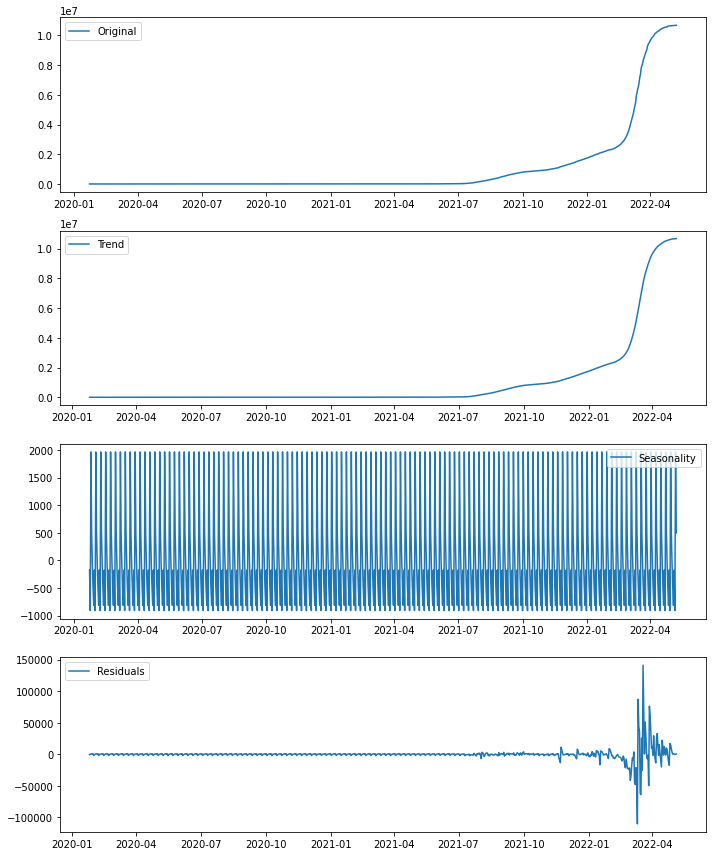

In [17]:
plt.figure(figsize=(10,12))
plt.subplot(411)
plt.plot(df_cases_train.set_index("date"), label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### 1.2. Mô hình nhân phân rã

In [18]:
decomposition = seasonal_decompose(df_cases_train.set_index("date").asfreq('D'), model="multiplicative")
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

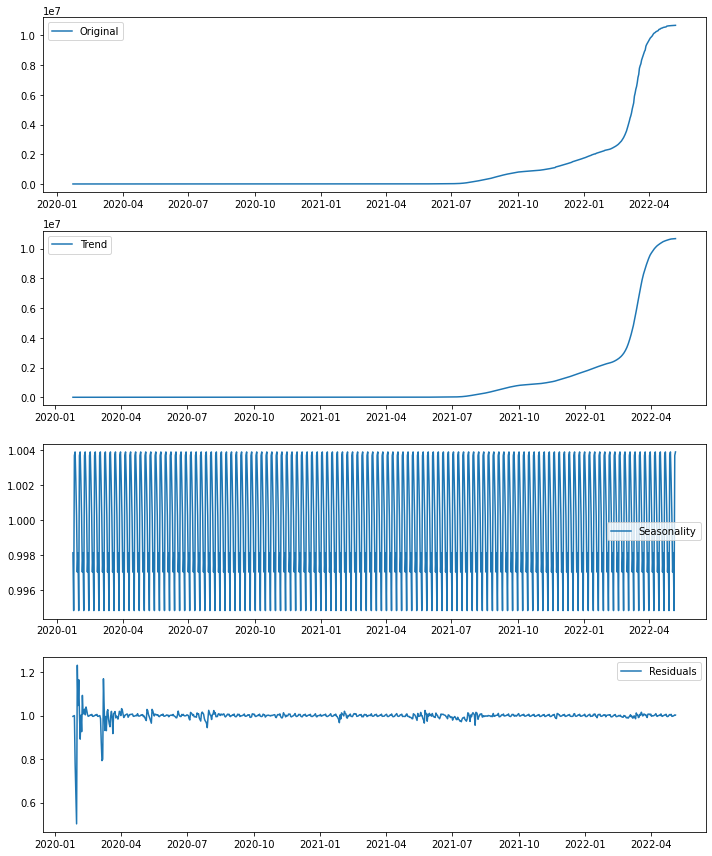

In [19]:
plt.figure(figsize=(10,12))
plt.subplot(411)
plt.plot(df_cases_train.set_index("date"), label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

## 2. Mô hình dự báo

In [20]:
df_cases = df[["date", "total_cases"]].dropna()

train_size = int(len(df_cases) * 0.92)
df_cases_train, df_cases_test = df_cases[0:train_size], df_cases[train_size:len(df_cases)]

In [21]:
model_ar= auto_arima(df_cases_train['total_cases'],trace=True, error_action='ignore',
                     start_p=0, start_d=0, start_q=0,
                     start_P=0, start_D=0, start_Q=0,
                     max_p=20, max_d=20, max_q=20,
                     max_P=20, max_D=20, max_Q=20,
                     suppress_warnings=True,stepwise=False,seasonal=False)
model_ar.fit(df_cases_train['total_cases'])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=19133.038, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=18698.989, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=18618.054, Time=0.10 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=18621.300, Time=0.10 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=18618.998, Time=0.16 sec
 ARIMA(0,2,5)(0,0,0)[0] intercept   : AIC=18500.610, Time=0.21 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=18774.513, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=18637.119, Time=0.07 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=18576.773, Time=0.26 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=18597.906, Time=0.30 sec
 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=18593.817, Time=0.24 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=18594.135, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=18595.840, Time=0.08 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=18587.783, Time=0.20 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=18586.856, Time=0.22

ARIMA(order=(0, 2, 5), scoring_args={}, suppress_warnings=True)

In [22]:
prediction_arima=model_ar.predict(len(df_cases_test['total_cases']))

In [23]:
prediction_arima=model_ar.predict(len(df_cases_test['total_cases']))

In [24]:
rmse = np.sqrt(mean_squared_error(df_cases_test['total_cases'], prediction_arima))
print("Root Mean Square Error for AR Model: ",rmse)

Root Mean Square Error for AR Model:  26764.13935312354


In [25]:
model = ARIMA(df_cases_train['total_cases'], order=(0, 2, 5))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            total_cases   No. Observations:                  837
Model:                 ARIMA(0, 2, 5)   Log Likelihood               -9243.305
Date:                Wed, 27 Jul 2022   AIC                          18498.609
Time:                        16:33:22   BIC                          18526.974
Sample:                             0   HQIC                         18509.483
                                - 837                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9406      0.011    -83.520      0.000      -0.963      -0.919
ma.L2          0.2943      0.014     20.850      0.000       0.267       0.322
ma.L3          0.1164      0.012     10.089      0.0

In [26]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_cases_train.index, y=df_cases_train['total_cases'],
              mode='lines+markers',name="Train Data for Total Cases"))
fig.add_trace(go.Scatter(x=df_cases_test.index, y=df_cases_test['total_cases'],
              mode='lines+markers',name="Test Data for Total Cases"))
fig.add_trace(go.Scatter(x=df_cases_test.index, y=prediction_arima,
              mode='lines+markers',name="ARIMA Predictions for Total Cases"))
fig.update_layout(title="Tổng số ca mắc bệnh theo mô hình dự đoán ARIMA",
                 xaxis_title="Date",yaxis_title="Total Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

### Nhận xét:
- Sau khi thử nghiệm các mô hình ARIMA với các tham số khác nhau, thì mô hình cho ra kết quả tốt nhất là ARIMA(0,2,5)(0,0,0)\[0].
- Mô hình khá tốt với các hệ số lượng đều có ý nghĩa thống kê (p-value rất nhỏ).
- Dự đoán tổng số ca nhiễm mới trong vòng 2 tháng với khoảng tin cậy là 95% bằng trực quan.